In [58]:
import pandas as pd
data = pd.read_csv("C:\\Users\\HP\\Downloads\\IMDB-Movie-Data.csv")
data.columns

Index(['Rank', 'Title', 'Genre', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [60]:
data.shape

(1000, 11)

In [62]:
data.head

<bound method NDFrame.head of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                 Director                                             Actors  \
0              James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1            Ridley Scott  Noomi Rapace, 

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [66]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [68]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [70]:
data['Revenue (Millions)'] = data['Revenue (Millions)'].fillna(data['Revenue (Millions)'].median())

In [72]:
data['Metascore'] = data['Metascore'].fillna(data['Metascore'].median())


In [74]:
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

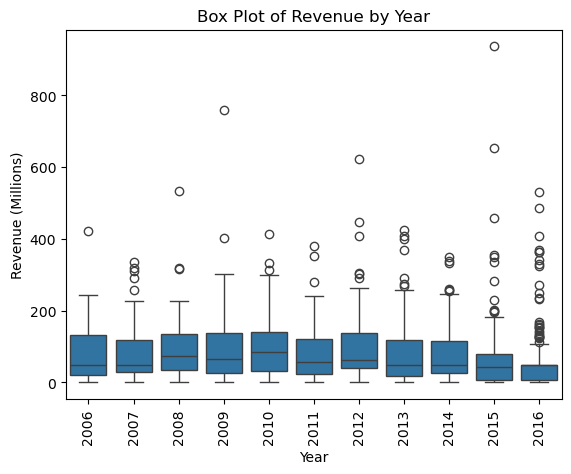

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Year', y='Revenue (Millions)', data=data)
plt.title('Box Plot of Revenue by Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.show()

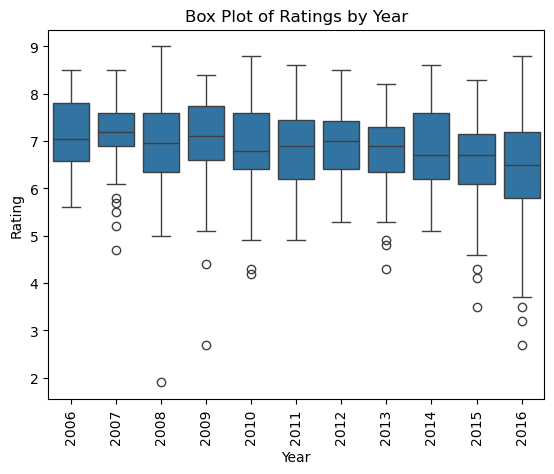

In [78]:
sns.boxplot(x='Year', y='Rating', data=data)
plt.title('Box Plot of Ratings by Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11708\3483343086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Genre', data=data, palette='viridis')


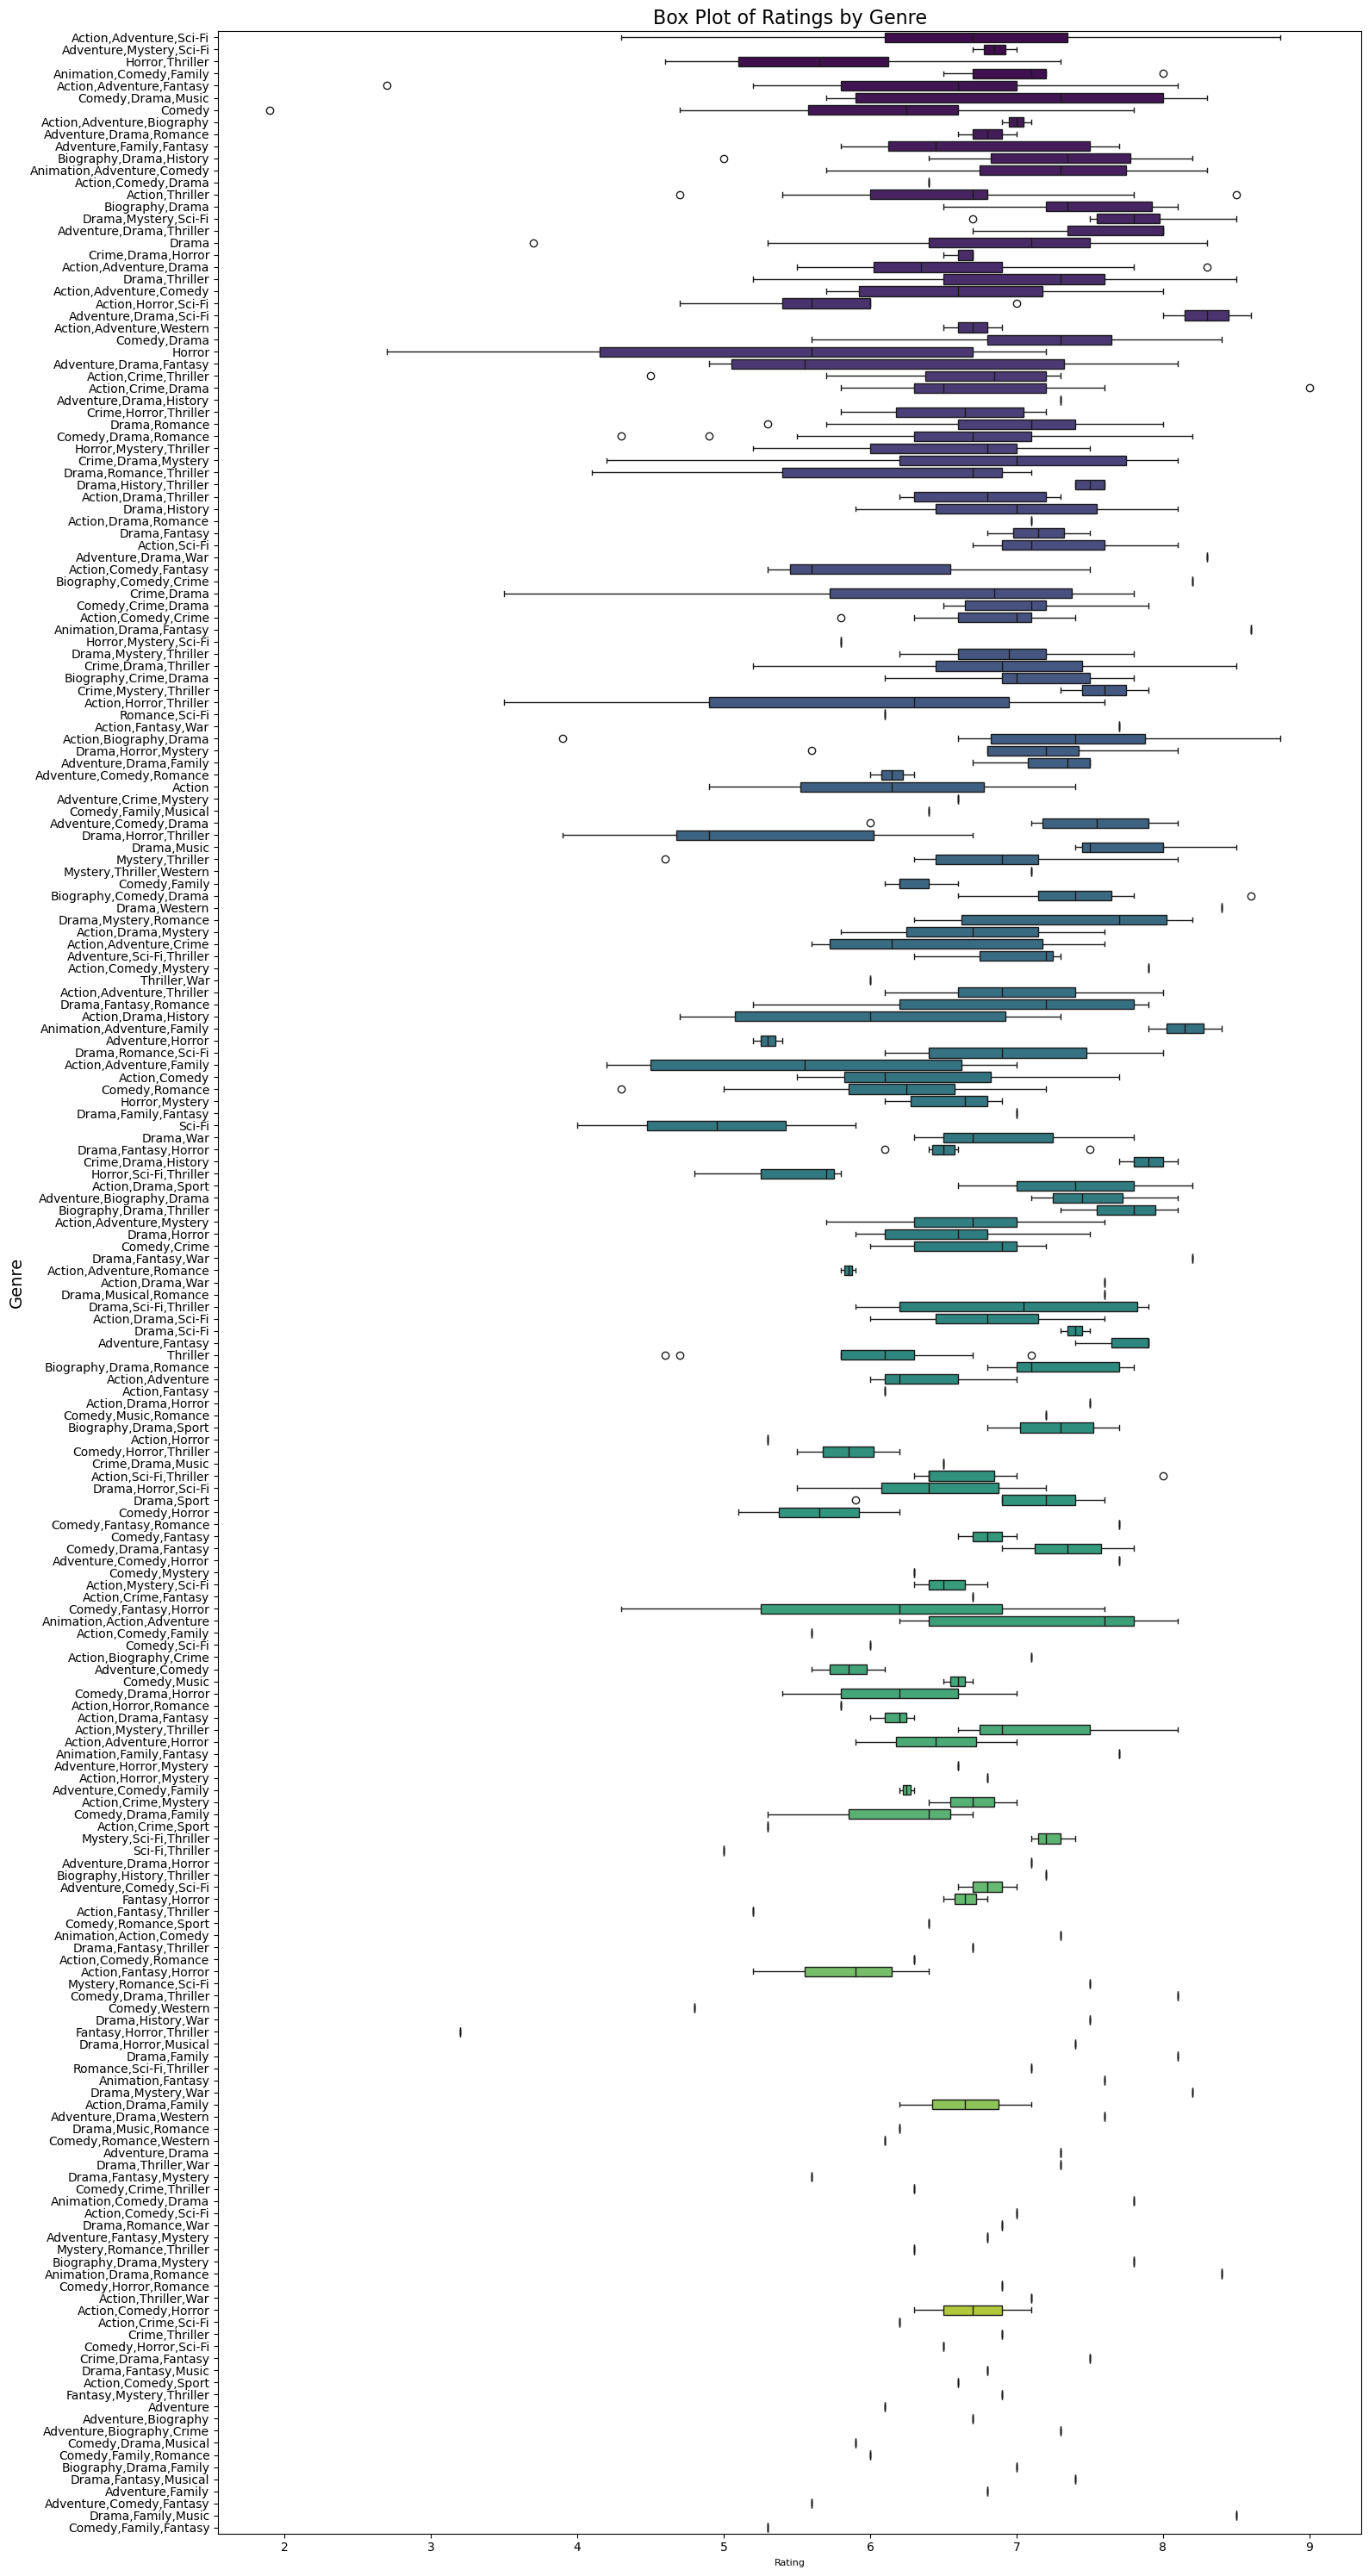

In [80]:
plt.figure(figsize=(16, 30)) 
sns.boxplot(x='Rating', y='Genre', data=data, palette='viridis')
plt.title('Box Plot of Ratings by Genre', fontsize=16) 
plt.xlabel('Rating', fontsize=8)
plt.ylabel('Genre', fontsize=14) 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.tight_layout()  
plt.show()

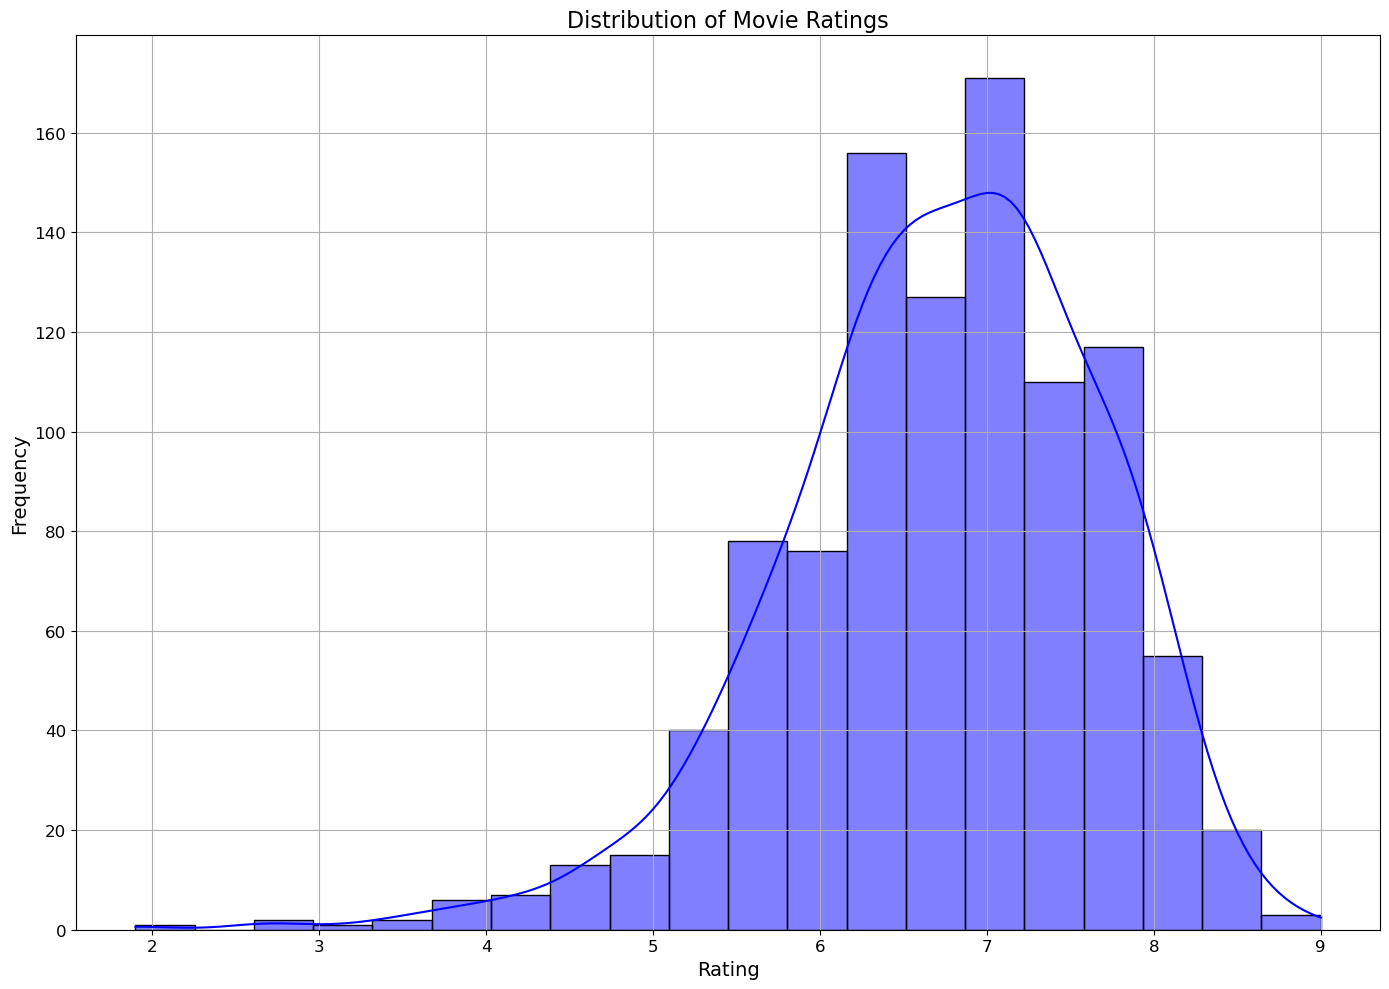

In [82]:
plt.figure(figsize=(14, 10)) 
sns.histplot(data['Rating'], bins=20, kde=True, color='blue')  
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14) 
plt.ylabel('Frequency', fontsize=14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  
plt.grid(True) 
plt.tight_layout()  
plt.show()

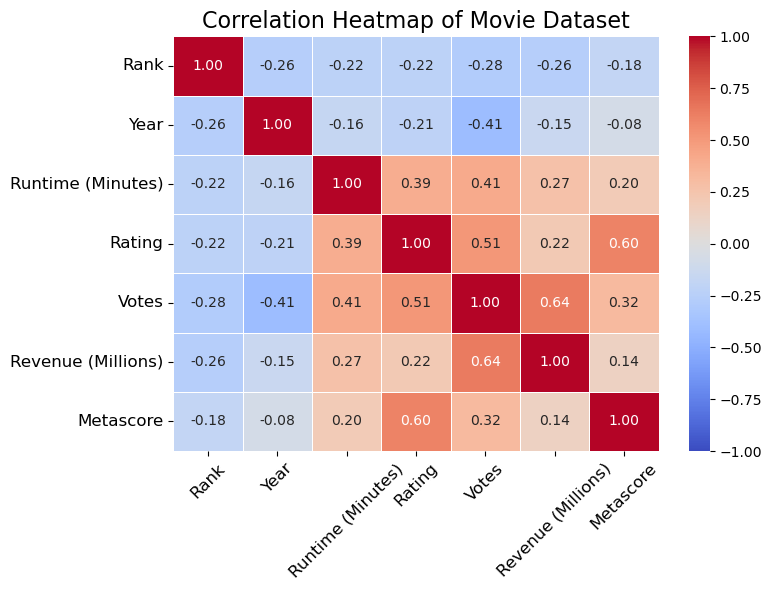

In [14]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Movie Dataset', fontsize=16)
plt.xticks(fontsize=12, rotation=45) 
plt.yticks(fontsize=12, rotation=0)  
plt.tight_layout()  
plt.show()

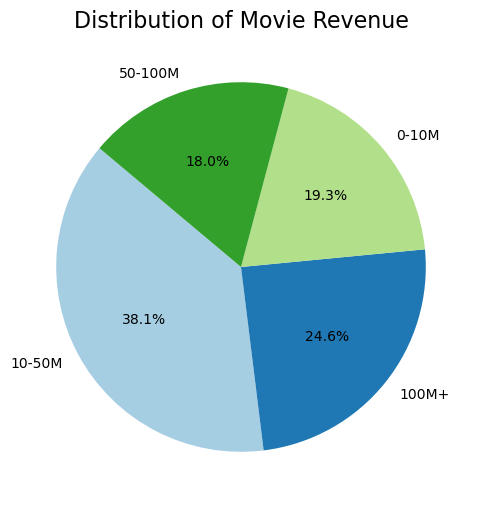

In [84]:
revenue_bins = pd.cut(data['Revenue (Millions)'], bins=[0, 10, 50, 100, 500], labels=['0-10M', '10-50M', '50-100M', '100M+'])
revenue_counts = revenue_bins.value_counts()
plt.figure(figsize=(8, 6)) 
plt.pie(
    revenue_counts,
    labels=revenue_counts.index,
    autopct='%1.1f%%',
    colors=plt.cm.Paired(range(len(revenue_counts))),
    startangle=140
)
plt.title('Distribution of Movie Revenue', fontsize=16)
plt.show()

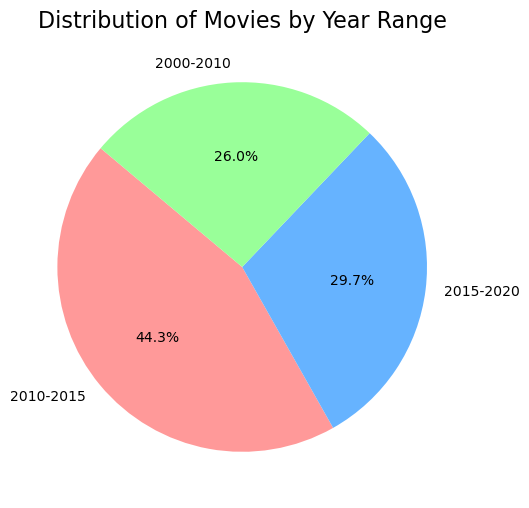

In [86]:
year_bins = pd.cut(
    data['Year'],
    bins=[2000, 2010, 2015, 2020], 
    labels=['2000-2010', '2010-2015', '2015-2020']
)
year_counts = year_bins.value_counts()
plt.figure(figsize=(8, 6)) 
colors = ['#ff9999','#66b3ff','#99ff99'] 
plt.pie(
    year_counts,
    labels=year_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)
plt.title('Distribution of Movies by Year Range', fontsize=16)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11708\3737680176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=filtered_data, palette='viridis')


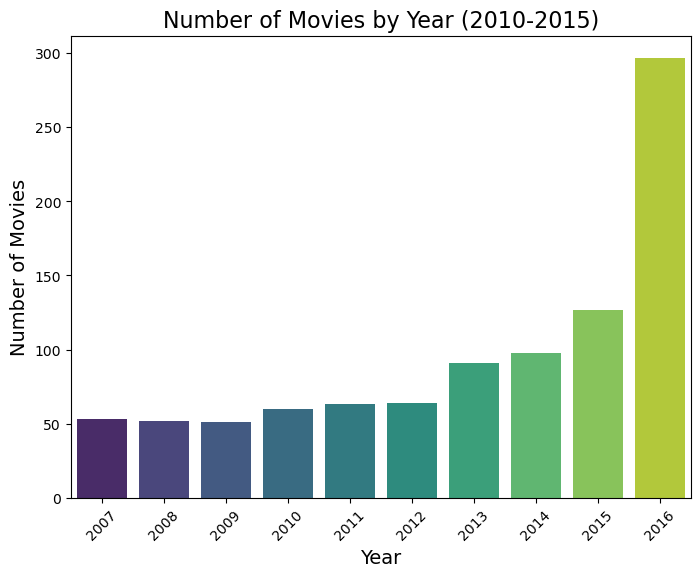

In [17]:
filtered_data = data[(data['Year'] >= 2007) & (data['Year'] <= 2017)]
plt.figure(figsize=(8,6))  
sns.countplot(x='Year', data=filtered_data, palette='viridis')
plt.title('Number of Movies by Year (2010-2015)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45) 
plt.show()

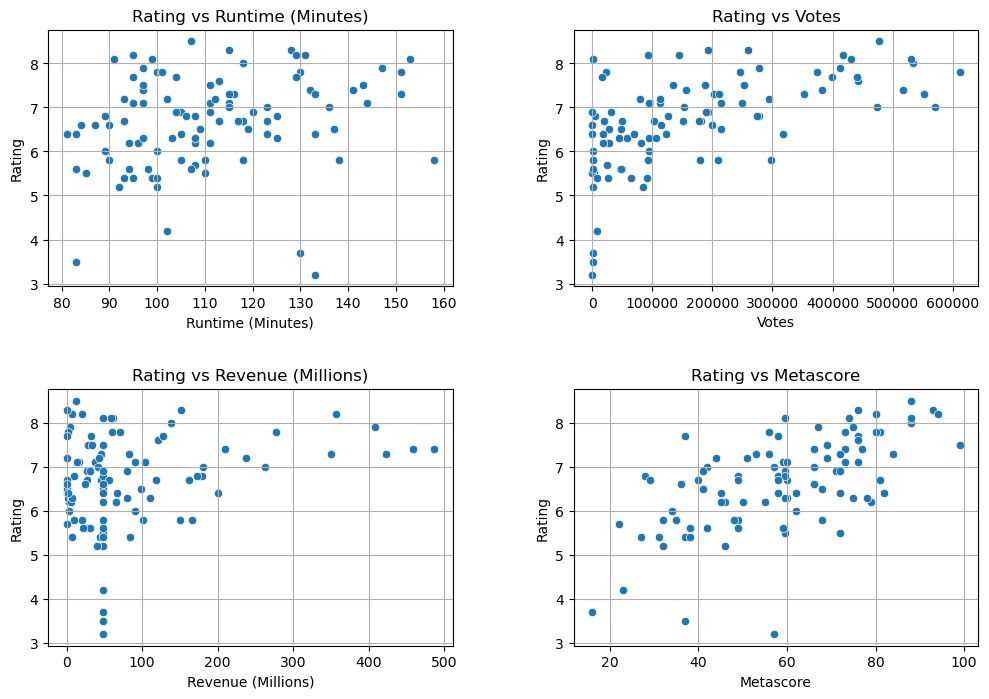

In [88]:
# Sample a fraction of the data for a less cluttered scatter plot
sampled_data = data.sample(frac=0.1, random_state=1)  # Sample 10% of the data

plt.figure(figsize=(12, 8))

# Scatter plot with sampled data
plt.subplot(2, 2, 1)
sns.scatterplot(x='Runtime (Minutes)', y='Rating', data=sampled_data)
plt.title('Rating vs Runtime (Minutes)')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.scatterplot(x='Votes', y='Rating', data=sampled_data)
plt.title('Rating vs Votes')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.scatterplot(x='Revenue (Millions)', y='Rating', data=sampled_data)
plt.title('Rating vs Revenue (Millions)')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(x='Metascore', y='Rating', data=sampled_data)
plt.title('Rating vs Metascore')
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()


In [233]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer 

In [235]:
X = data.drop('Rating', axis=1)  
y = data['Rating']

In [237]:
categorical_columns = ['Title', 'Genre', 'Director', 'Actors']
numerical_columns = ['Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore']

In [239]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [241]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [243]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

In [245]:
X_encoded = pd.get_dummies(X_train, columns=categorical_columns)
X_encoded[numerical_columns] = X_encoded[numerical_columns].astype(float)

X_encoded.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns)

X_val_encoded = X_val_encoded.reindex(columns=X_encoded.columns, fill_value=0)

In [247]:
xgb_model = XGBRegressor()  
xgb_model.fit(X_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [248]:
y_val_pred = xgb_model.predict(X_val_encoded)

val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 0.760114267477405


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [340]:
xgb_model = XGBRegressor(enable_categorical=True)

In [341]:
#parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

In [342]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_encoded, y_train) 

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [343]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [253]:
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_encoded) 
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 0.7330799800336583


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [255]:
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [259]:
pipeline = Pipeline(steps=[('preprocessor', column_transformer),
                             ('model', xgb_model)]) 

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Runtime (Minutes)',
                                                   'Votes',
                                                   'Revenue (Millions)',
                                                   'Metascore']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Title', 'Genre', 'Director',
                                                   'Actors'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [278]:
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

y_test_pred = best_model.predict(X_test_encoded)

In [280]:
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.5523160230435046


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [282]:
output_df = pd.DataFrame({
    'Movie Title': X_test['Title'], 
    'Actual Rating': y_test,
    'Predicted Rating': y_test_pred
})

print(output_df.head())

                     Movie Title  Actual Rating  Predicted Rating
557               Dracula Untold            6.3          6.127030
798  A Walk Among the Tombstones            6.5          6.774877
977                Amateur Night            5.0          5.213303
136       No Country for Old Men            8.1          8.131850
575          Clash of the Titans            5.8          6.228639


In [284]:
predictions = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_test_pred})
print(predictions.head())

     Actual Rating  Predicted Rating
557            6.3          6.127030
798            6.5          6.774877
977            5.0          5.213303
136            8.1          8.131850
575            5.8          6.228639


In [316]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [351]:
print(X_encoded.isnull().sum())
print(y_train.isnull().sum())

Rank                                                                                0
Year                                                                                0
Runtime (Minutes)                                                                   0
Votes                                                                               0
Revenue (Millions)                                                                  0
                                                                                   ..
Actors_Zach Galifianakis, Bradley Cooper, Justin Bartha, Ed Helms                   0
Actors_Zach Galifianakis, Kristen Wiig, Owen Wilson, Ross Kimball                   0
Actors_Zachary Gordon, Robert Capron, Devon Bostick,Steve Zahn                      0
Actors_Zoey Deutch, Nicholas Braun, Mateo Arias, Israel Broussard                   0
Actors_Zooey Deschanel, Joseph Gordon-Levitt, Geoffrey Arend, Chloë Grace Moretz    0
Length: 2064, dtype: int64
0


In [391]:
def predict_movie_rating(model, column_transformer):
    # Get user input
    print("Getting user input...")
    title = input("Enter the movie title: ")
    genre = input("Enter the genre: ")
    director = input("Enter the director: ")
    actors = input("Enter the actors (comma-separated): ")
    year = int(input("Enter the release year: "))
    runtime = int(input("Enter the runtime in minutes: "))
    votes = int(input("Enter the number of votes: "))
    revenue = float(input("Enter the revenue in millions: "))
    metascore = float(input("Enter the metascore: "))

    print("Creating DataFrame...")
    # Create a DataFrame from the input
    input_data = pd.DataFrame({
        'Title': [title],
        'Genre': [genre],
        'Director': [director],
        'Actors': [actors],
        'Year': [year],
        'Runtime (Minutes)': [runtime],
        'Votes': [votes],
        'Revenue (Millions)': [revenue],
        'Metascore': [metascore]
    })

    print("Encoding input data...")
    # One-hot encode the input data using pd.get_dummies
    input_encoded = pd.get_dummies(input_data, columns=categorical_columns)

    print("Reindexing input data...")
    # Reindex the input to match the columns of X_encoded (training data)
    input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    print("Predicting rating...")
    # Predict the rating
    predicted_rating = model.predict(input_encoded)

    print(f'Predicted Rating for "{title}": {predicted_rating[0]}')

# Make sure to call the function
predict_movie_rating(best_model, column_transformer)


Getting user input...


Enter the movie title:  goat
Enter the genre:  action
Enter the director:  christopher nolan
Enter the actors (comma-separated):  andrew garfield, emma stone
Enter the release year:  2016
Enter the runtime in minutes:  128
Enter the number of votes:  597776
Enter the revenue in millions:  550.12
Enter the metascore:  67


Creating DataFrame...
Encoding input data...
Reindexing input data...
Predicting rating...
Predicted Rating for "goat": 7.728080749511719


In [393]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_test_pred)

# R² Score
r2 = r2_score(y_test, y_test_pred)

# Display 
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


RMSE: 0.5523160230435046
MAE: 0.40301865641276036
R² Score: 0.5916610242195406


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
